#ML_ClusteringBikes

<p><strong>Objetivo: </strong> El objetivo de este cuaderno es aplicar el algoritmo de clustering a un conjunto de datos e interpretar los resultados: </p>

##Cargar los datos

Para este ejercicio se estará utilizando el conjunto de datos AdventureWorks. Es un conjunto de datos de clientes, compradores de bicicletas. Se desea conocer más sobre estos clientes para realizar estrategias de mercado:

<ul>
  <li>descripción de los datos: <a href="https://www.dropbox.com/s/5nzmdlfby2xxanz/Descripci%C3%B3nAtributos.txt?dl=0" target="_blank">https://www.dropbox.com/s/5nzmdlfby2xxanz/Descripci%C3%B3nAtributos.txt?dl=0</a></li>
  <li>fuente de datos: <a href="https://www.dropbox.com/s/6dd31lfmwkhmssp/AdventureWorks.csv?dl=1" target="_blank">https://www.dropbox.com/s/6dd31lfmwkhmssp/AdventureWorks.csv?dl=1</a></li>
  <li>tipo de datos: csv</li>
</ul>

Se va a utilizar la librería Pandas de Python para realizar la lectura de archivos. Este archivo ya viene con cabeceras por lo que no es necesario cargarlas. Se cargan los datos y se muestra el resultado:

In [0]:
# Importar libreria requerida
import pandas as pd

# Leer datos desde archivo CSV
csv_path = "https://www.dropbox.com/s/wyar6w832y8z8w6/AdventureWorks.csv?dl=1"
df = pd.read_csv(csv_path,sep=",")

df.head()

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,SpanishEducation,SpanishOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,BikeBuyer,CustomerKey
0,M,M,90000,2,0,Licenciatura,Profesional,1,0,1-2 Miles,Pacific,49,1,11000
1,S,M,60000,3,3,Licenciatura,Profesional,0,1,0-1 Miles,Pacific,49,1,11001
2,M,M,60000,3,3,Licenciatura,Profesional,1,1,2-5 Miles,Pacific,49,1,11002
3,S,F,70000,0,0,Licenciatura,Profesional,0,1,5-10 Miles,Pacific,47,1,11003
4,S,F,80000,5,5,Licenciatura,Profesional,1,4,1-2 Miles,Pacific,46,1,11004


##Preparando los datos

Se va a realizar una copia del dataframe original <b>df</b>, para no perder los datos originales, y se van a realizar todas las transformaciones en <b>cluster_df</b>:

In [0]:
cluster_df = df.copy()
cluster_df.head()

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,SpanishEducation,SpanishOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,BikeBuyer,CustomerKey
0,M,M,90000,2,0,Licenciatura,Profesional,1,0,1-2 Miles,Pacific,49,1,11000
1,S,M,60000,3,3,Licenciatura,Profesional,0,1,0-1 Miles,Pacific,49,1,11001
2,M,M,60000,3,3,Licenciatura,Profesional,1,1,2-5 Miles,Pacific,49,1,11002
3,S,F,70000,0,0,Licenciatura,Profesional,0,1,5-10 Miles,Pacific,47,1,11003
4,S,F,80000,5,5,Licenciatura,Profesional,1,4,1-2 Miles,Pacific,46,1,11004


In [0]:
df['Region'].value_counts().to_frame()

,Region
North America,9390
Pacific,3591


La columna <b>CustomerKey</b> tiene todos los valores diferentes por lo que no debe entrar al algoritmo. La columna <b>Region</b> solo posee dos valores, y además los datos están desproporsionados,  por lo que no aportará mucho a la asignación de clusters, es mejor eliminarla:

In [0]:
cluster_df.drop("CustomerKey", axis=1, inplace=True)
cluster_df.drop("Region", axis=1, inplace=True)

Como el algoritmo solo acepta datos numéricos, es necesario Numerizar aquellas columnas que sean categóricas.
<p>Las columnas <b>MaritalStatus</b> y <b>Gender</b> se pueden numerizar de 1 a 1, sustituyendo por 0 y 1 sus valores.</p>
<p>La columna <b>CommuteDistance</b> se puede numerizar 1 a 1 porque es ordinal</p>
<p>Las columnas <b>SpanishEducation</b> y <b>SpanishOccupation</b> se deben numerizar de 1 a n pues no son ordinales.</p>

In [0]:
#Numerizacion 1 a 1
cluster_df = pd.get_dummies(cluster_df, columns = ["MaritalStatus"], drop_first = True)
cluster_df = pd.get_dummies(cluster_df, columns = ["Gender"], drop_first = True)
cluster_df.head()

,YearlyIncome,TotalChildren,NumberChildrenAtHome,SpanishEducation,SpanishOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Age,BikeBuyer,MaritalStatus_S,Gender_M
0,90000,2,0,Licenciatura,Profesional,1,0,1-2 Miles,49,1,0,1
1,60000,3,3,Licenciatura,Profesional,0,1,0-1 Miles,49,1,1,1
2,60000,3,3,Licenciatura,Profesional,1,1,2-5 Miles,49,1,0,1
3,70000,0,0,Licenciatura,Profesional,0,1,5-10 Miles,47,1,1,0
4,80000,5,5,Licenciatura,Profesional,1,4,1-2 Miles,46,1,1,0


In [0]:
cluster_df["CommuteDistance"].value_counts()

Out[6]: 0-1 Miles     6310
2-5 Miles     3234
1-2 Miles     3232
5-10 Miles    3214
10+ Miles     2494
Name: CommuteDistance, dtype: int64

In [0]:
cluster_df["CommuteDistance"].replace({"0-1 Miles":"1","1-2 Miles":"2","2-5 Miles":"3","5-10 Miles":"4","10+ Miles":"5"}, inplace = True)
cluster_df.head(10)

,YearlyIncome,TotalChildren,NumberChildrenAtHome,SpanishEducation,SpanishOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Age,BikeBuyer,MaritalStatus_S,Gender_M
0,90000,2,0,Licenciatura,Profesional,1,0,2,49,1,0,1
1,60000,3,3,Licenciatura,Profesional,0,1,1,49,1,1,1
2,60000,3,3,Licenciatura,Profesional,1,1,3,49,1,0,1
3,70000,0,0,Licenciatura,Profesional,0,1,4,47,1,1,0
4,80000,5,5,Licenciatura,Profesional,1,4,2,46,1,1,0
5,70000,0,0,Licenciatura,Profesional,1,1,4,49,1,1,1
6,70000,0,0,Licenciatura,Profesional,1,1,4,49,1,1,0
7,60000,3,3,Licenciatura,Profesional,1,2,1,50,1,0,1
8,60000,4,4,Licenciatura,Profesional,1,3,5,50,1,1,0
9,70000,0,0,Licenciatura,Profesional,0,1,4,51,1,1,1


In [0]:
#Numerizacion 1 a n
cluster_df = pd.get_dummies(cluster_df, columns = ["SpanishEducation"])
cluster_df = pd.get_dummies(cluster_df, columns = ["SpanishOccupation"])
cluster_df.head()

,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Age,BikeBuyer,MaritalStatus_S,Gender_M,SpanishEducation_Educación secundaria,SpanishEducation_Educación secundaria (en curso),SpanishEducation_Estudios de postgrado,SpanishEducation_Estudios universitarios (en curso),SpanishEducation_Licenciatura,SpanishOccupation_Administrativo,SpanishOccupation_Gestión,SpanishOccupation_Obrero,SpanishOccupation_Obrero especializado,SpanishOccupation_Profesional
0,90000,2,0,1,0,2,49,1,0,1,0,0,0,0,1,0,0,0,0,1
1,60000,3,3,0,1,1,49,1,1,1,0,0,0,0,1,0,0,0,0,1
2,60000,3,3,1,1,3,49,1,0,1,0,0,0,0,1,0,0,0,0,1
3,70000,0,0,0,1,4,47,1,1,0,0,0,0,0,1,0,0,0,0,1
4,80000,5,5,1,4,2,46,1,1,0,0,0,0,0,1,0,0,0,0,1


La técnica de clustering es una técnica basada en distancias, por lo que es muy importante realizar la <b>Normalización</b> de todas las variables. Se aplicará la normalización Z-Score:

In [0]:
cluster_df["CommuteDistance"] = pd.to_numeric(cluster_df["CommuteDistance"],errors='coerce')

In [0]:
#Normalización Z-SCORE. Sustituimos el valor directamente en la columna
cluster_df['YearlyIncome'] = (cluster_df['YearlyIncome'] - cluster_df['YearlyIncome'].mean())/cluster_df['YearlyIncome'].std()
cluster_df['TotalChildren'] = (cluster_df['TotalChildren'] - cluster_df['TotalChildren'].mean())/cluster_df['TotalChildren'].std()
cluster_df['NumberChildrenAtHome'] = (cluster_df['NumberChildrenAtHome'] - cluster_df['NumberChildrenAtHome'].mean())/cluster_df['NumberChildrenAtHome'].std()
cluster_df['NumberCarsOwned'] = (cluster_df['NumberCarsOwned'] - cluster_df['NumberCarsOwned'].mean())/cluster_df['NumberCarsOwned'].std()
cluster_df['Age'] = (cluster_df['Age'] - cluster_df['Age'].mean())/cluster_df['Age'].std()
cluster_df['CommuteDistance'] = (cluster_df['CommuteDistance'] - cluster_df['CommuteDistance'].mean())/cluster_df['CommuteDistance'].std()
cluster_df.head()

,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Age,BikeBuyer,MaritalStatus_S,Gender_M,SpanishEducation_Educación secundaria,SpanishEducation_Educación secundaria (en curso),SpanishEducation_Estudios de postgrado,SpanishEducation_Estudios universitarios (en curso),SpanishEducation_Licenciatura,SpanishOccupation_Administrativo,SpanishOccupation_Gestión,SpanishOccupation_Obrero,SpanishOccupation_Obrero especializado,SpanishOccupation_Profesional
0,1.012649,0.096531,-0.659410,1,-1.320022,-0.406136,-0.330641,1,0,1,0,0,0,0,1,0,0,0,0,1
1,0.083449,0.716722,1.310826,0,-0.441592,-1.099050,-0.330641,1,1,1,0,0,0,0,1,0,0,0,0,1
2,0.083449,0.716722,1.310826,1,-0.441592,0.286777,-0.330641,1,0,1,0,0,0,0,1,0,0,0,0,1
3,0.393182,-1.143849,-0.659410,0,-0.441592,0.979691,-0.508345,1,1,0,0,0,0,0,1,0,0,0,0,1
4,0.702916,1.957103,2.624318,1,2.193701,-0.406136,-0.597197,1,1,0,0,0,0,0,1,0,0,0,0,1


In [0]:
cluster_df.dtypes

Out[11]: YearlyIncome                                           float64
TotalChildren                                          float64
NumberChildrenAtHome                                   float64
HouseOwnerFlag                                           int64
NumberCarsOwned                                        float64
CommuteDistance                                        float64
Age                                                    float64
BikeBuyer                                                int64
MaritalStatus_S                                          uint8
Gender_M                                                 uint8
SpanishEducation_Educación secundaria                    uint8
SpanishEducation_Educación secundaria (en curso)         uint8
SpanishEducation_Estudios de postgrado                   uint8
SpanishEducation_Estudios universitarios (en curso)      uint8
SpanishEducation_Licenciatura                            uint8
SpanishOccupation_Administrativo              

##Aplicando el algoritmo

Se configura el algoritmo para ejecutarse utilizando <b>k-means++</b>, con <b>k=3</b> y <b>n_init = 12</b>:

In [0]:
from sklearn.cluster import KMeans
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

Se aplica el algoritmo k-medias al conjunto de datos:

In [0]:
k_means.fit(cluster_df)

Out[13]: KMeans(n_clusters=3, n_init=12)

Se asignan las etiquetas al conjunto de datos:

In [0]:
cluster_df["Cluster"] = k_means.labels_
cluster_df.head(10)

,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Age,BikeBuyer,MaritalStatus_S,Gender_M,SpanishEducation_Educación secundaria,SpanishEducation_Educación secundaria (en curso),SpanishEducation_Estudios de postgrado,SpanishEducation_Estudios universitarios (en curso),SpanishEducation_Licenciatura,SpanishOccupation_Administrativo,SpanishOccupation_Gestión,SpanishOccupation_Obrero,SpanishOccupation_Obrero especializado,SpanishOccupation_Profesional,Cluster
0,1.012649,0.096531,-0.659410,1,-1.320022,-0.406136,-0.330641,1,0,1,0,0,0,0,1,0,0,0,0,1,1
1,0.083449,0.716722,1.310826,0,-0.441592,-1.099050,-0.330641,1,1,1,0,0,0,0,1,0,0,0,0,1,1
2,0.083449,0.716722,1.310826,1,-0.441592,0.286777,-0.330641,1,0,1,0,0,0,0,1,0,0,0,0,1,2
3,0.393182,-1.143849,-0.659410,0,-0.441592,0.979691,-0.508345,1,1,0,0,0,0,0,1,0,0,0,0,1,1
4,0.702916,1.957103,2.624318,1,2.193701,-0.406136,-0.597197,1,1,0,0,0,0,0,1,0,0,0,0,1,2
5,0.393182,-1.143849,-0.659410,1,-0.441592,0.979691,-0.330641,1,1,1,0,0,0,0,1,0,0,0,0,1,1
6,0.393182,-1.143849,-0.659410,1,-0.441592,0.979691,-0.330641,1,1,0,0,0,0,0,1,0,0,0,0,1,1
7,0.083449,0.716722,1.310826,1,0.436839,-1.099050,-0.241790,1,0,1,0,0,0,0,1,0,0,0,0,1,2
8,0.083449,1.336912,1.967572,1,1.315270,1.672604,-0.241790,1,1,0,0,0,0,0,1,0,0,0,0,1,2
9,0.393182,-1.143849,-0.659410,0,-0.441592,0.979691,-0.152938,1,1,1,0,0,0,0,1,0,0,0,0,1,1


Revise el valor de los centroides para evaluar que atributo tuvo más peso en cada cluster:

In [0]:
cluster_df.groupby('Cluster').mean()

,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Age,BikeBuyer,MaritalStatus_S,Gender_M,SpanishEducation_Educación secundaria,SpanishEducation_Educación secundaria (en curso),SpanishEducation_Estudios de postgrado,SpanishEducation_Estudios universitarios (en curso),SpanishEducation_Licenciatura,SpanishOccupation_Administrativo,SpanishOccupation_Gestión,SpanishOccupation_Obrero,SpanishOccupation_Obrero especializado,SpanishOccupation_Profesional
Cluster,,,,,,,,,,,,,,,,,,,,
0,-0.058997,0.709990,-0.367142,0.720000,0.191585,0.528984,1.147798,0.410251,0.374271,0.506533,0.261508,0.140302,0.157588,0.246030,0.194573,0.116181,0.277588,0.044221,0.222111,0.339899
1,-0.414725,-0.605607,-0.394152,0.629785,-0.506124,-0.367422,-0.584400,0.573913,0.533433,0.502649,0.143228,0.071864,0.195102,0.294553,0.295252,0.229385,0.034683,0.212194,0.304948,0.218791
2,1.267931,0.721147,1.646696,0.747432,1.173127,0.298049,0.038991,0.384989,0.363584,0.514269,0.159817,0.046804,0.129281,0.254852,0.409247,0.015696,0.384418,0.011701,0.120148,0.468037


Identifique el atributo que más influye en cada cluster:

Haz doble clic <b>aquí</b> para ver la solución.

<!-- Posible respuesta:

El orden de los clusters puede variar para cada ejecución:

Cluster 0: Gente sin Hijos, bajos ingresos y jovenes
Cluster 1: Gente mayor, con hijos que ya no viven en casa y bajos ingresos
Cluster 2: Gente con altos ingresos, hijos, dueños de casa y carro

-->

Para conocer el número de elementos en cada cluster:

In [0]:
df["Cluster"] = k_means.labels_
df['Cluster'].value_counts()

Out[16]: 1    10005
0     4975
2     3504
Name: Cluster, dtype: int64

Para visualizar los datos y ver los distintos clusters creados se utiliza la librería Seaborn. Se visualizan los atributos <b>YearlyIncome</b> y <b>Age</b>:

Out[17]: <seaborn.axisgrid.FacetGrid at 0x7f6c4cc8faf0>

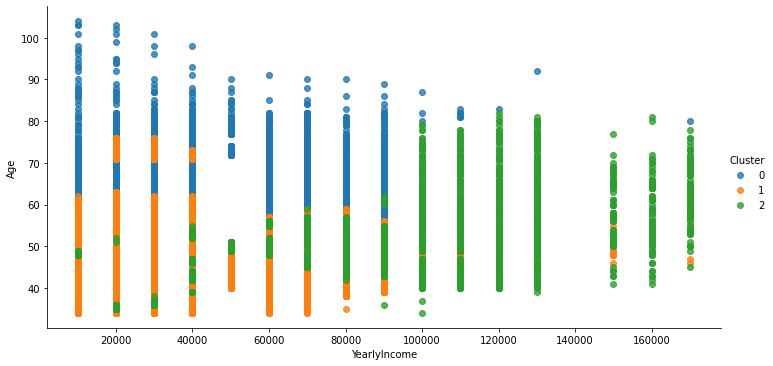

In [0]:
import seaborn as sns
labels = pd.DataFrame(k_means.labels_)
sns.lmplot(x='YearlyIncome',y='Age',data=df,hue='Cluster',fit_reg=False, height = 5, aspect = 2)

##Determinar el valor de K

Para evaluar la calidad de los clusters, se pueden aplicar diferentes estrategias. A continuación se generan diferentes ejecuciones del algoritmo, variando la K y se calcula el error cuadrático para cada K y se grafica con el objetivo de encontrar la mejor K:

In [0]:
kmeans_k = {"init": "k-means++", "n_init": 12, "max_iter": 300}
# A list holds the SSE values for each k
sse = []
for k in range(1, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_k)
  kmeans.fit(cluster_df)
  sse.append(kmeans.inertia_)

Se visualizan las diferentes K, con los errores obtenidos:

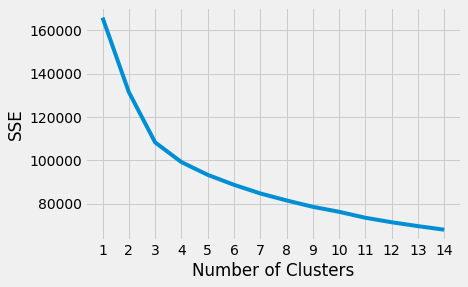

In [0]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

##Calcular el coheficiente de Silhoutte

Para un cálculo rápido del coheficiente total se puede utilizar el siguiente código:

In [0]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=3): {silhouette_score(cluster_df, k_means.labels_)}')

Silhouette Score(n=3): 0.22301008076548778


Para calcular varias alternativas y visualizar los resultados, se puede utilizar la librería <b>Yellowbrick</b>. Si usted no está utilizando Databricks debe eliminar el comando <b>%sh</b>:

In [0]:
%sh
pip install yellowbrick

You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


Out[22]: SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, n_init=12))findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


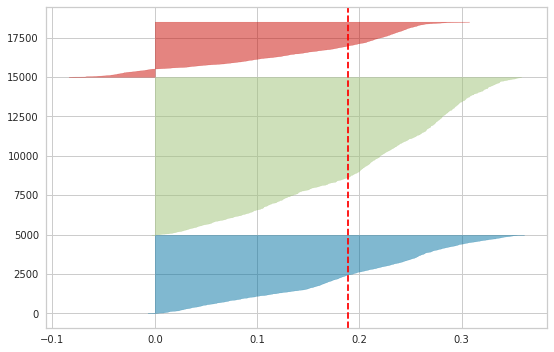

In [0]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(k_means, colors='yellowbrick')
df1 = cluster_df.copy() # copia del dataframe para eliminar la columna CLuster
df1.drop(['Cluster'], axis = 'columns', inplace = True) # Se elimina la columna Cluster
visualizer.fit(df1) # Se visualiza el resultado para una ejecución

Como se puede apreciar en el gráfico anterior, los resultados del coeficiente son bajos (por debajo de 0.5) por lo que la agrupación no es buena. La línea roja representa el coeficiente total para k=3, y cada gráfico (montaña o pico) muestra los resultados para cada cluster.

Si desea evaluar el resultado con varias alternativas, ejecute el siguiente código:

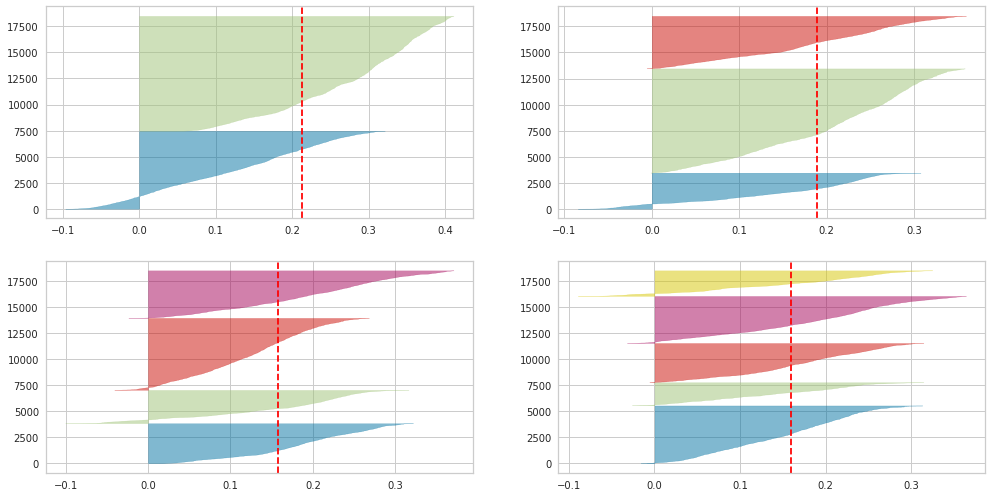

In [0]:
fig, ax = plt.subplots(2, 2, figsize=(15,8)) # se van a visualizar varias gráficas
for i in [2, 3, 4, 5]: # se va a probar con varios valores de K
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42) # Se configura el modelo con cada K
    q, mod = divmod(i, 2) # Esto es para visualizar los 4 graficos uno al lado del otro
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod]) # Se crean visualizaciones para cada valor de K
    visualizer.fit(df1)

En el gráfico anterior se puede observar que los resultados no mejoran mucho para k=2, k=3, k=4 y k=5.

Links de ayuda interesantes:
<ul>
    <li>Clustering with Scikit-learn: https://scikit-learn.org/stable/modules/clustering.html</li>
    <li>7 ways to label a cluster plot in Python: https://nikkimarinsek.com/blog/7-ways-to-label-a-cluster-plot-python</li> 
<ul>